In [261]:
!pip install yfinance
!pip install statsmodels

In [262]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [263]:
#Stocks Tickers are

tickers_array=["MARUTI.NS","TCS.NS","WIPRO.NS","TATASTEEL.NS","ITC.NS"]
beta_array=[0]*5
df1=pd.DataFrame(yf.download(tickers_array[0],start="2022-06-04",end="2024-06-04",period="1d"))
df2=pd.DataFrame(yf.download(tickers_array[1],start="2022-06-04",end="2024-06-04",period="1d"))
df3=pd.DataFrame(yf.download(tickers_array[2],start="2022-06-04",end="2024-06-04",period="1d"))
df4=pd.DataFrame(yf.download(tickers_array[3],start="2022-06-04",end="2024-06-04",period="1d"))
df5=pd.DataFrame(yf.download(tickers_array[4],start="2022-06-04",end="2024-06-04",period="1d"))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [264]:
def beta(ticker):
    tickers=[ticker,"^NSEI"]
    data=pd.DataFrame()
    for t in tickers:
        data[t]=yf.download(t,start="2022-06-04",end="2024-06-04",period="1d")["Close"]
    returns=np.log(data/data.shift(1))
    market_var=returns["^NSEI"].var()
    cov=returns.cov()
    cov
    beta=cov.iloc[1,0]/market_var
    return beta


Selected Time Period = 2 Years to analyse how the stock Performed in Last 2 Years and assuming similar trends for the coming year. 5 Years is a too long timeframe to assume and we cannot predict that the stock will perform like before giving high returns.

In [265]:
for i in range(0,5):
    beta_array[i]=beta(tickers_array[i])
beta_array

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[0.7052111154833077,
 0.9091559133335727,
 1.1365812619251838,
 1.369485456609375,
 0.6567898178223175]

In [266]:
# in billion INR
market_cap=[48.608,140.36,450.455,48.668,27.465]
weight_array=[0]*5
for i in range(len(weight_array)):
    weight_array[i]=market_cap[i]/sum(market_cap)
weight_array

[0.06793039258981826,
 0.19615515766760394,
 0.6295174661382197,
 0.068014243469414,
 0.03838274013494401]

In [267]:
weighted_beta=0
for i in range(len(beta_array)):
    weighted_beta=weighted_beta+(weight_array[i]*beta_array[i])
print("Weighted Average Beta is:",weighted_beta)

Weighted Average Beta is: 1.060092555699591


In [268]:
rf=7.033  #India 10 Year Bond
rm=14.925 #return of markets for previous 2 Years
expected_returns=[0]*5
for i in range(0,5):
    expected_returns[i]=rf+beta_array[i]*(rm-rf)
expected_returns

[12.598526123394265,
 14.208058468028558,
 16.002899319113553,
 17.840979223561188,
 12.216385242253729]

In [269]:
portfolio_returns=0
for i in range(0,5):
    portfolio_returns=portfolio_returns+(weight_array[i]*expected_returns[i])
print("Expected Return of Portfolio is:",portfolio_returns)

Expected Return of Portfolio is: 15.399250449581173


In [270]:
df=pd.DataFrame()
for ticker in tickers_array:
    df2=yf.download(ticker,start="2022-06-04",end="2024-06-04",period="1d")
    df[ticker]=df2["Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [271]:
returns=np.log(df/df.shift(1))
returns.dropna(inplace=True)
returns.describe()


,MARUTI.NS,TCS.NS,WIPRO.NS,TATASTEEL.NS,ITC.NS
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.000982,0.000156,-0.000130,0.000980,0.000915
std,0.012367,0.012529,0.013934,0.017502,0.011558
min,-0.055960,-0.047554,-0.073345,-0.062183,-0.040769
25%,-0.006516,-0.006823,-0.007759,-0.006995,-0.005810
50%,0.000291,-0.000151,-0.000259,0.000876,0.001000
75%,0.007199,0.006961,0.007043,0.009940,0.008035
max,0.060846,0.051484,0.063926,0.069757,0.046495


In [272]:
er=np.array(returns.describe().loc["mean"])
std=np.array(returns.describe().loc["std"])
varcov = returns.cov()
varcov

,MARUTI.NS,TCS.NS,WIPRO.NS,TATASTEEL.NS,ITC.NS
MARUTI.NS,0.000153,0.000022,0.000032,0.000056,0.000033
TCS.NS,0.000022,0.000157,0.000111,0.000055,0.000017
WIPRO.NS,0.000032,0.000111,0.000194,0.000090,0.000032
TATASTEEL.NS,0.000056,0.000055,0.000090,0.000306,0.000045
ITC.NS,0.000033,0.000017,0.000032,0.000045,0.000134


In [273]:
sharpe_ratio=np.array((252*returns.describe().loc["mean"]-0)/(np.sqrt(252)*returns.describe().loc["std"]))
sharpe_ratio

array([ 1.26062525,  0.19719843, -0.14757059,  0.88870953,  1.25728351])

In [274]:
#Portfolio A
c1 = 0
weightA = np.linalg.inv(varcov)@(er-c1)/np.sum(np.linalg.inv(varcov)@(er-c1))
ErA=weightA @ er  
varA = weightA@varcov@weightA.T
stdA=np.sqrt(varA)

In [275]:
#Portfolio B
c2 = 0.05
weightB = np.linalg.inv(varcov)@(er-c2)/np.sum(np.linalg.inv(varcov)@(er-c2))
ErB=weightB @ er  
varB = weightB@varcov@weightB.T
stdB=np.sqrt(varB)

In [276]:
covAB = weightA@varcov@weightB.T
wa=np.linspace(-0.7,1.5,100)
wb=1-wa
ErC = wa*ErA+wb*ErB
stdC=np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)

In [277]:
unit_matrix = np.ones((varcov.shape[0]))
min_portfolio_var= unit_matrix@np.linalg.inv(varcov)/(unit_matrix@np.linalg.inv(varcov)@unit_matrix.T)
min_portfolio_var

array([0.27815755, 0.28636064, 0.04238466, 0.04293072, 0.35016644])

In [278]:
ErM = min_portfolio_var@er
stdM=np.sqrt(min_portfolio_var@varcov@min_portfolio_var.T)

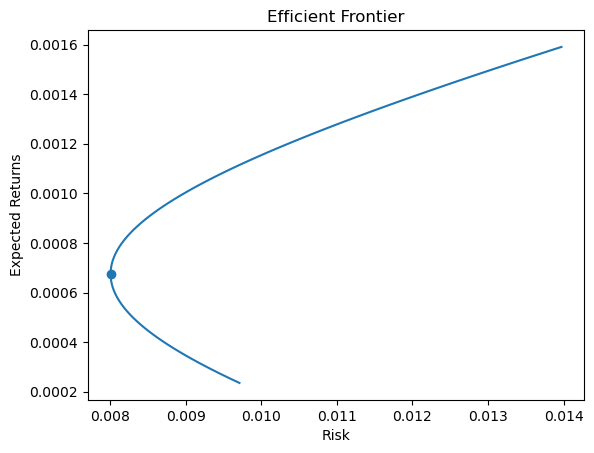

In [279]:
# Efficient Frontier
plt.title("Efficient Frontier")
plt.plot(stdC,ErC)
plt.scatter(stdM,ErM)
plt.xlabel("Risk")
plt.ylabel("Expected Returns")
plt.show()

Problem 3)

In [280]:
# ADF TEST
from statsmodels.tsa.stattools import adfuller
df1["returns"]=(df1["Close"]-df1["Open"])/df1["Open"]
adfuller(df1["returns"])


(-21.863296723114253,
 0.0,
 0,
 490,
 {'1%': -3.4437660979098843,
  '5%': -2.8674565460819896,
  '10%': -2.569921291128696},
 -2826.7910104261)

In [281]:
adfuller(df2["Close"])
df2["returns"]=(df2["Close"]-df2["Open"])/df2["Open"]
adfuller(df2["returns"])

(-23.513659257923184,
 0.0,
 0,
 490,
 {'1%': -3.4437660979098843,
  '5%': -2.8674565460819896,
  '10%': -2.569921291128696},
 -2904.378193933736)

In [282]:
adfuller(df3["Close"])
df3["returns"]=(df3["Close"]-df3["Open"])/df3["Open"]
adfuller(df3["returns"])

(-9.019054319482887,
 5.842426367275267e-15,
 4,
 486,
 {'1%': -3.4438771098680196,
  '5%': -2.867505393939065,
  '10%': -2.569947324764179},
 -2869.2980941426376)

In [283]:
adfuller(df4["Close"])
df4["returns"]=(df4["Close"]-df4["Open"])/df4["Open"]
adfuller(df4["returns"])

(-9.723359466970656,
 9.414582555059177e-17,
 6,
 484,
 {'1%': -3.4439333076538854,
  '5%': -2.8675301216074414,
  '10%': -2.56996050355167},
 -2616.8301943773185)

In [284]:
adfuller(df5["Close"])
df5["returns"]=(df5["Close"]-df5["Open"])/df5["Open"]
adfuller(df5["Close"])

(-2.025446302896973,
 0.27552842308362435,
 1,
 489,
 {'1%': -3.4437936797256317,
  '5%': -2.867468682890213,
  '10%': -2.5699277594606915},
 2784.7371660474537)

In [285]:
# KPSS Test
import statsmodels.api as sm
sm.tsa.stattools.kpss(df1["Close"], regression='ct')

(0.5748066848145552,
 0.01,
 12,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [286]:
sm.tsa.stattools.kpss(df2["Close"], regression='ct')

(0.7149735191369486,
 0.01,
 12,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [287]:
sm.tsa.stattools.kpss(df3["Close"], regression='ct')

(0.6047322062100637,
 0.01,
 12,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [288]:
sm.tsa.stattools.kpss(df4["Close"], regression='ct')

(0.5818189557762897,
 0.01,
 12,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [289]:
sm.tsa.stattools.kpss(df5["Close"], regression='ct')

(0.7149735191369486,
 0.01,
 12,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

We can Observe that from ADF Test and KPSS on comparing the results with p-values we are getting Non-Stationary Series.

In [290]:
# Durbin-Watson Test
from statsmodels.formula.api import ols
model1 = ols('Close ~ Open', data=df1).fit()
print(model1.summary())
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model1.resid)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.395e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:50:55   Log-Likelihood:                -3056.1
No. Observations:                 491   AIC:                             6116.
Df Residuals:                     489   BIC:                             6125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7979     42.092      0.518      0.6

1.9566346995536146

In [291]:
model2 = ols('Close ~ Open', data=df2).fit()
print(model2.summary())
durbin_watson(model2.resid)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 8.541e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:50:55   Log-Likelihood:                -1424.9
No. Observations:                 491   AIC:                             2854.
Df Residuals:                     489   BIC:                             2862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0650      1.351      3.009      0.0

2.1555387475323267

In [292]:
model3 = ols('Close ~ Open', data=df3).fit()
print(model3.summary())
durbin_watson(model3.resid)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.684e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:50:55   Log-Likelihood:                -1502.7
No. Observations:                 491   AIC:                             3009.
Df Residuals:                     489   BIC:                             3018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3401      2.543      1.707      0.0

1.8505787006095462

In [293]:
model4 = ols('Close ~ Open', data=df4).fit()
print(model4.summary())
durbin_watson(model4.resid)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.389e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:50:55   Log-Likelihood:                -1012.2
No. Observations:                 491   AIC:                             2028.
Df Residuals:                     489   BIC:                             2037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6606      0.522      1.267      0.2

2.0920636407404603

In [294]:
model5 = ols('Close ~ Open', data=df5).fit()
print(model5.summary())
durbin_watson(model5.resid)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 8.541e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:50:55   Log-Likelihood:                -1424.9
No. Observations:                 491   AIC:                             2854.
Df Residuals:                     489   BIC:                             2862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0650      1.351      3.009      0.0

2.1555387475323267

In [295]:
# Granger Casuality Test
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
data1 = df1[["Close","Open"]].pct_change().dropna()
gc_res = grangercausalitytests(data1, [4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9127  , p=0.4562  , df_denom=477, df_num=4
ssr based chi2 test:   chi2=3.7197  , p=0.4453  , df=4
likelihood ratio test: chi2=3.7055  , p=0.4473  , df=4
parameter F test:         F=0.9127  , p=0.4562  , df_denom=477, df_num=4


In [296]:
data2 = df2[["Close","Open"]].pct_change().dropna()
gc_res = grangercausalitytests(data2, [4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8284  , p=0.5075  , df_denom=477, df_num=4
ssr based chi2 test:   chi2=3.3762  , p=0.4970  , df=4
likelihood ratio test: chi2=3.3645  , p=0.4988  , df=4
parameter F test:         F=0.8284  , p=0.5075  , df_denom=477, df_num=4


In [297]:
data3 = df3[["Close","Open"]].pct_change().dropna()
gc_res = grangercausalitytests(data3, [4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6570  , p=0.0323  , df_denom=477, df_num=4
ssr based chi2 test:   chi2=10.8286 , p=0.0286  , df=4
likelihood ratio test: chi2=10.7097 , p=0.0300  , df=4
parameter F test:         F=2.6570  , p=0.0323  , df_denom=477, df_num=4


In [298]:
data4 = df4[["Close","Open"]].pct_change().dropna()
gc_res = grangercausalitytests(data4, [4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6429  , p=0.1623  , df_denom=477, df_num=4
ssr based chi2 test:   chi2=6.6955  , p=0.1529  , df=4
likelihood ratio test: chi2=6.6498  , p=0.1556  , df=4
parameter F test:         F=1.6429  , p=0.1623  , df_denom=477, df_num=4


In [299]:
data5 = df5[["Close","Open"]].pct_change().dropna()
gc_res = grangercausalitytests(data5, [4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8284  , p=0.5075  , df_denom=477, df_num=4
ssr based chi2 test:   chi2=3.3762  , p=0.4970  , df=4
likelihood ratio test: chi2=3.3645  , p=0.4988  , df=4
parameter F test:         F=0.8284  , p=0.5075  , df_denom=477, df_num=4
